In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

# Fetch Adult dataset
adult = fetch_openml(name='adult', version=1, parser='auto')

# Data (as pandas DataFrame)
data = pd.DataFrame(adult.data, columns=adult.feature_names)
data['income'] = adult.target


In [2]:
# Fill missing values with the mean for numeric columns
data_numeric = data.select_dtypes(include='number')
data_numeric_filled = data_numeric.fillna(data_numeric.mean())

# Fill missing values with the mode for categorical columns
data_categorical = data.select_dtypes(exclude='number')
data_categorical_filled = data_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Apply Winsorization to numeric columns
winsor_percentile = 0.05
for col in data_numeric_filled.columns:
    data_numeric_filled[col] = winsorize(data_numeric_filled[col], limits=[winsor_percentile, winsor_percentile])

# Concatenate winsorized numeric columns with categorical columns
data_winsorized = pd.concat([data_numeric_filled, data_categorical_filled], axis=1)

# Encode categorical variables
data_encoded_winsorized = pd.get_dummies(data_winsorized, drop_first=True)

# Split data into features and target variable
X = data_encoded_winsorized.drop('income_>50K', axis=1)
y = data_encoded_winsorized['income_>50K']



In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.95)  # Keep components explaining 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model Training and Evaluation - Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

In [4]:
# Evaluate the model
nb_report = classification_report(y_test, nb_pred)
print("Naïve Bayes Classifier Performance:")
print(nb_report)

Naïve Bayes Classifier Performance:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      7414
           1       0.56      0.75      0.64      2355

    accuracy                           0.80      9769
   macro avg       0.74      0.78      0.75      9769
weighted avg       0.83      0.80      0.81      9769



In [5]:
# Model Training and Evaluation - Random Forest Classification
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_report = classification_report(y_test, rf_pred)
print("\nRandom Forest Classifier Performance:")
print(rf_report)


Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7414
           1       0.67      0.55      0.60      2355

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.74      9769
weighted avg       0.82      0.83      0.82      9769



In [ ]:
# Perform cross-validation (Naive Bayes)
nb_cv_scores_accuracy = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("\nNaïve Bayes Classifier Cross-Validation Accuracy Scores:")
print(nb_cv_scores_accuracy)
print("Mean Accuracy:", nb_cv_scores_accuracy.mean())



Naïve Bayes Classifier Cross-Validation Accuracy Scores:
[0.79769674 0.80729367 0.80972489 0.80419759 0.76106987]
Mean Accuracy: 0.7959965519505732


In [ ]:
# Perform cross-validation (Random Forest)
rf_cv_scores_accuracy = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("\nRandom Forest Classifier Cross-Validation Accuracy Scores:")
print(rf_cv_scores_accuracy)
print("Mean Accuracy:", rf_cv_scores_accuracy.mean())


Random Forest Classifier Cross-Validation Accuracy Scores:
[0.83352527 0.83544466 0.82815099 0.82889685 0.83081648]
Mean Accuracy: 0.8313668512689709


In [6]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Naïve Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix for Naïve Bayes Classifier:")
print(nb_conf_matrix)

# Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("\nConfusion Matrix for Random Forest Classifier:")
print(rf_conf_matrix)


Confusion Matrix for Naïve Bayes Classifier:
[[6013 1401]
 [ 583 1772]]

Confusion Matrix for Random Forest Classifier:
[[6771  643]
 [1065 1290]]


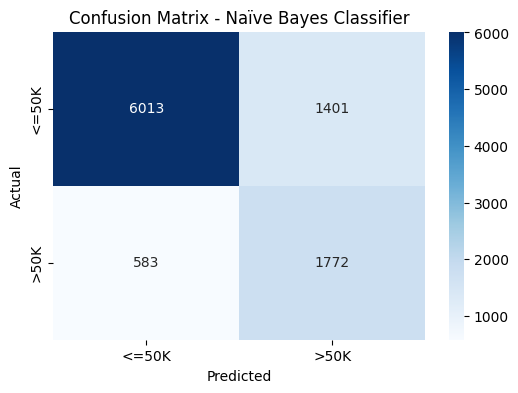

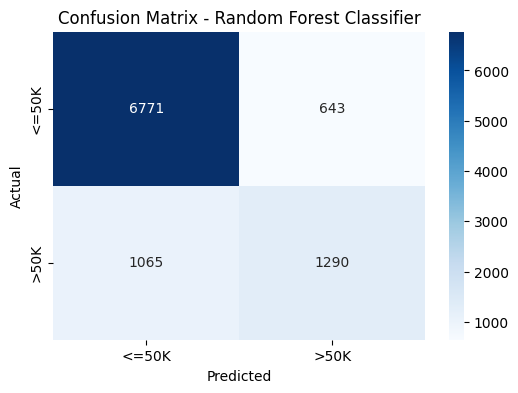

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
confusion_matrix_nb = np.array([[6013, 1401], [583, 1772]])
confusion_matrix_rf = np.array([[6771, 643], [1065, 1290]])

# Define class labels
labels = ['<=50K', '>50K']

# Plot confusion matrix for Naïve Bayes Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Naïve Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
